In [1]:
#эта строка вызывается везде
#from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow и tf.keras
import tensorflow as tf

# Вспомогательные библиотеки
import numpy as np
import matplotlib.pyplot as plt
import os

tf.keras.backend.clear_session()  # For easy reset of notebook state.
print(tf.__version__)
# CPU == 2.0.0 +
# GPU == 2.0.0 +

2.1.0


In [2]:
from tensorflow import keras
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator


In [3]:
train_dir = r'C:\Datasets\RPC-Tensorflow\rps'
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=30,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

test_dir = r'C:\Datasets\RPC-Tensorflow\rps-test-set'
test_datagen = ImageDataGenerator(rescale=1./255)

tran_generator = train_datagen.flow_from_directory(train_dir,
                                                  target_size = (150, 150),
                                                  batch_size = 20,
                                                  class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                 target_size = (150, 150),
                                                 batch_size = 20,
                                                 class_mode = 'categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [4]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, (3,3), activation='relu', input_shape = (150, 150, 3)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [6]:
log_dir = r'C:\Datasets\RPC-Tensorflow\TB_log'
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, embeddings_freq=1)
checkpoints = keras.callbacks.ModelCheckpoint("model_weight.h5", monitor='val_accuracy',
                                             save_weights_only=True, mode='max', verbose=1)

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(tran_generator,
                   epochs=25,
                   steps_per_epoch=20,
                   validation_data=test_generator,
                   verbose=1,
                   validation_steps=3,
                   callbacks=[tensorboard_callback,checkpoints])

model.save('RockPapSci-TF.h5')

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 20 steps, validate for 3 steps
Epoch 1/25
19/20 [===========================>..] - ETA: 0s - loss: 1.2918 - accuracy: 0.3500
Epoch 00001: saving model to model_weight.h5
20/20 [==============================] - 8s 391ms/step - loss: 1.2818 - accuracy: 0.3525 - val_loss: 1.1092 - val_accuracy: 0.2667
Epoch 2/25
19/20 [===========================>..] - ETA: 0s - loss: 1.0993 - accuracy: 0.3342
Epoch 00002: saving model to model_weight.h5
20/20 [==============================] - 5s 241ms/step - loss: 1.0988 - accuracy: 0.3400 - val_loss: 1.1115 - val_accuracy: 0.2667
Epoch 3/25
19/20 [===========================>..] - ETA: 0s - loss: 1.1157 - accuracy: 0.3395
Epoch 00003: saving model to model_weight.h5
20/20 [==============================] - 4s 225ms/step - loss: 1.1153 - accuracy: 0.3325 - val_loss: 1.0951 - val_accuracy: 0.4000
Epoch 4/25
19/20 [===========================>..] - ETA: 0s - loss: 1.1689 - accuracy: 0.3842
Epoch

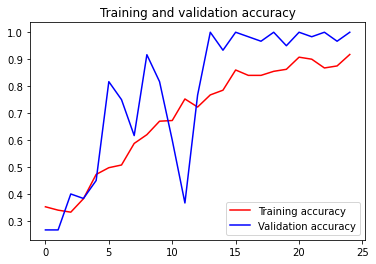

<Figure size 432x288 with 0 Axes>

In [7]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [8]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)